In [1]:
import pandas as pd
import tensorflow as tf
from collections import namedtuple
import os  
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



In [2]:
i = 0
os.chdir("/home/chinesh/Desktop/Internship/Input_output_data")
for fn in os.listdir('.'):
    if os.path.isfile(fn):
        df = pd.read_pickle(fn)
        if i==0:
            data = pd.DataFrame(df[0]) 
            #print (fn)
            i=1
        else:
            data = data.append(df[0],ignore_index=True)
             #print (fn)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,234378,247.400000,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False
1,234378,293.539231,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False
2,71195,376.700000,54.470,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False
3,201816,395.973846,54.470,p1,nimbussanl,#000000,10.0,0,False,False,False,False,False,False,False,False
4,166593,406.110769,54.470,p1,nimbussanl,#000000,10.0,0,True,True,False,False,False,False,False,False


In [3]:
print data.size


1719904


In [4]:
i = 0
os.chdir("/home/chinesh/Desktop/Internship/Input_output_data")
for fn in os.listdir('.'):
    if os.path.isfile(fn):
        df = pd.read_pickle(fn)
        if i==0:
            output = pd.DataFrame(df[1]) 
            
            #print (fn)
            i=1
        else:
            output = output.append(df[1],ignore_index=True)
output.head()

,0
0,1
1,0
2,0
3,0
4,0


In [5]:
column_names = ["Word ID","X","Y","Page ID","Font Style","Color","size","bold","an uppercse","all uppercase","single digit","multiple digit","special character","email","hperlink","calender month"]
data.columns = column_names
data.head()

,Word ID,X,Y,Page ID,Font Style,Color,size,bold,an uppercse,all uppercase,single digit,multiple digit,special character,email,hperlink,calender month
0,234378,247.400000,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False
1,234378,293.539231,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False
2,71195,376.700000,54.470,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False
3,201816,395.973846,54.470,p1,nimbussanl,#000000,10.0,0,False,False,False,False,False,False,False,False
4,166593,406.110769,54.470,p1,nimbussanl,#000000,10.0,0,True,True,False,False,False,False,False,False


In [6]:
column_names_output = ["output"]
output.columns = column_names_output
output.head()

,output
0,1
1,0
2,0
3,0
4,0


In [7]:
#check if there is any missing value
data.isnull().values.any()

False

In [8]:
#get the type of data
print("Data types and their frequency\n{}".format(data.dtypes.value_counts()))


Data types and their frequency
bool       8
float64    3
object     3
int64      2
dtype: int64


In [9]:
object_columns_df = data.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

Page ID               p1
Font Style    nimbussanl
Color            #000000
Name: 0, dtype: object


In [10]:
cols = ['Page ID', 'Font Style','Color']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

('Page ID', ':')
(p1     25177
p2     22644
p3     19961
p4     16764
p5     10234
p6      5664
p7      3864
p8      1737
p9       458
p12      415
p11      347
p10      229
Name: Page ID, dtype: int64, '\n')
('Font Style', ':')
(utopia            40365
dejavusans        33339
nimbussanl        22688
nimbusromno9l      6214
dejavuserif        3546
urwpalladiol       1169
dejavusansmono      150
nimbusmonl           12
opensymbol            7
standardsyml          4
Name: Font Style, dtype: int64, '\n')
('Color', ':')
(#000000    72122
#656565    30778
#878787     1748
#434343      908
#02304b      566
#003265      169
#323232      163
#212121      152
#2d73b4      129
#bfbfbf      120
#0000ff      111
#202020       99
#363d4c       71
#0d75b4       70
#ffffff       66
#00007f       58
#070349       42
#001f5f       20
#070707       15
#263590       14
#323298       12
#7f7f7f       11
#ffff98       11
#16355c       10
#006fbf        8
#ff0000        8
#d4a5bc        7
#252525        3


In [11]:
object_columns_df_output = output.select_dtypes(include=['object'])
print(object_columns_df_output.iloc[0])

Series([], Name: 0, dtype: float64)


In [12]:
output.apply(pd.value_counts)

,output
0,106154
1,1340


In [13]:
object_columns_df.head()

,Page ID,Font Style,Color
0,p1,nimbussanl,#000000
1,p1,nimbussanl,#000000
2,p1,nimbussanl,#000000
3,p1,nimbussanl,#000000
4,p1,nimbussanl,#000000


In [14]:
#classes
nominal_columns = ["Page ID", "Font Style", "Color"]
dummy_df = pd.get_dummies(object_columns_df[nominal_columns])
d2 = pd.concat([object_columns_df, dummy_df], axis=1)
d2 = d2.drop(nominal_columns, axis=1)
d2.head()

,Page ID_p1,Page ID_p10,Page ID_p11,Page ID_p12,Page ID_p2,Page ID_p3,Page ID_p4,Page ID_p5,Page ID_p6,Page ID_p7,...,Color_#363d4c,Color_#434343,Color_#656565,Color_#7f7f7f,Color_#878787,Color_#bfbfbf,Color_#d4a5bc,Color_#ff0000,Color_#ffff98,Color_#ffffff
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#boolean
d3 = data[["an uppercse", "all uppercase","single digit","multiple digit","special character","email","hperlink","calender month"]].astype(int)
d3.head()

,an uppercse,all uppercase,single digit,multiple digit,special character,email,hperlink,calender month
0,1,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0


In [16]:
cols_to_norm = ['X','Y','size','bold']
d4 = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
d4.head()

,X,Y,size,bold
0,0.423140,0.011455,0.476440,0.0
1,0.502086,0.011455,0.476440,0.0
2,0.644378,0.046306,0.267016,0.0
3,0.677356,0.046306,0.267016,0.0
4,0.694701,0.046306,0.267016,0.0


In [17]:
#convert the data using one-hot encoding
processed = pd.concat([d4, d3,d2], axis=1)
processed.head()

,X,Y,size,bold,an uppercse,all uppercase,single digit,multiple digit,special character,email,...,Color_#363d4c,Color_#434343,Color_#656565,Color_#7f7f7f,Color_#878787,Color_#bfbfbf,Color_#d4a5bc,Color_#ff0000,Color_#ffff98,Color_#ffffff
0,0.423140,0.011455,0.476440,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.502086,0.011455,0.476440,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.644378,0.046306,0.267016,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.677356,0.046306,0.267016,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.694701,0.046306,0.267016,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
processed.shape

(107494, 63)

In [19]:
X, y = shuffle(processed.values, output.values, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test ,test_size=0.50, random_state=0)

In [20]:
#feature reduction using PCA, estimate how much compoents to be used
pca = PCA(n_components=50)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
var= pca.explained_variance_ratio_
var

array([  2.60303051e-01,   1.02299226e-01,   9.55888116e-02,
         8.41423731e-02,   7.32385045e-02,   6.28417429e-02,
         4.12176529e-02,   3.90580423e-02,   3.46278400e-02,
         3.07370005e-02,   2.44125025e-02,   2.13350259e-02,
         1.96845039e-02,   1.68421544e-02,   1.61173212e-02,
         1.45426804e-02,   1.33146766e-02,   1.05106544e-02,
         6.72948346e-03,   4.75034986e-03,   4.27714107e-03,
         4.00280771e-03,   3.35507349e-03,   2.29057738e-03,
         1.94436841e-03,   1.50006176e-03,   1.21812698e-03,
         1.14035436e-03,   1.02060773e-03,   8.52268396e-04,
         6.40295748e-04,   6.19341283e-04,   5.83783752e-04,
         5.58897349e-04,   5.39640008e-04,   4.85016083e-04,
         4.35051220e-04,   4.06011325e-04,   3.34193426e-04,
         2.70781061e-04,   2.41865016e-04,   2.04550026e-04,
         1.63975841e-04,   7.33730158e-05,   5.75864531e-05,
         5.22694103e-05,   5.13290979e-05,   4.64472622e-05,
         4.37635738e-05,

[ 26.03  36.26  45.82  54.23  61.55  67.83  71.95  75.86  79.32  82.39
  84.83  86.96  88.93  90.61  92.22  93.67  95.    96.05  96.72  97.2
  97.63  98.03  98.37  98.6   98.79  98.94  99.06  99.17  99.27  99.36
  99.42  99.48  99.54  99.6   99.65  99.7   99.74  99.78  99.81  99.84
  99.86  99.88  99.9   99.91  99.92  99.93  99.94  99.94  99.94  99.94]


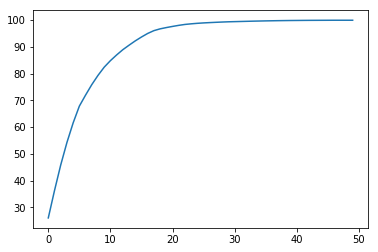

In [22]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print (var1)
plt.plot(var1)
plt.show()

In [23]:
#graph suggest data can be represented using 25 features
pca = PCA(n_components=25)
pca.fit(processed.values)
X_train_reduced = pca.transform(X_train)

In [24]:
X_train_reduced.shape

(85995, 25)

In [25]:
X_test_reduced = pca.transform(X_test)
print (X_test_reduced.shape)
X_val_reduced = pca.transform(X_val)
print (X_val_reduced.shape)

(10750, 25)
(10749, 25)


In [26]:
#SVM

clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)
clf.fit(X_train_reduced, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [27]:
pred = clf.predict(X_test_reduced)
print (accuracy_score(y_test, pred))
print (f1_score(y_test, pred, average=None))

0.993395348837
[ 0.9966712   0.58479532]


In [28]:
#gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train_reduced, y_train).predict(X_test_reduced)
print (accuracy_score(y_test, y_pred))
print (f1_score(y_test, y_pred, average=None))

0.955627906977
[ 0.97712998  0.25816485]


In [29]:
#multilayer perceptron
train_x, valid_x, train_y, valid_y = X_train_reduced,X_val_reduced,y_train,y_val
def build_neural_network(hidden_units=25):
    tf.reset_default_graph()
                                                      
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph
    
model = build_neural_network()

In [30]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [31]:
epochs = 5
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=512

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
    saver.save(sess, "section1.ckpt")


('Epoch: 1/5', 'Train Loss: 0.2062', 'Train Acc: 0.9920')
('Epoch: 1/5', 'Validation Loss: 0.3248', 'Validation Acc: 0.9929')
('Epoch: 2/5', 'Train Loss: 0.0915', 'Train Acc: 0.9926')
('Epoch: 2/5', 'Validation Loss: 0.1396', 'Validation Acc: 0.9931')
('Epoch: 2/5', 'Train Loss: 0.0573', 'Train Acc: 0.9928')
('Epoch: 2/5', 'Validation Loss: 0.0707', 'Validation Acc: 0.9931')
('Epoch: 3/5', 'Train Loss: 0.0435', 'Train Acc: 0.9929')
('Epoch: 3/5', 'Validation Loss: 0.0471', 'Validation Acc: 0.9933')
('Epoch: 3/5', 'Train Loss: 0.0366', 'Train Acc: 0.9930')
('Epoch: 3/5', 'Validation Loss: 0.0381', 'Validation Acc: 0.9933')
('Epoch: 4/5', 'Train Loss: 0.0325', 'Train Acc: 0.9930')
('Epoch: 4/5', 'Validation Loss: 0.0333', 'Validation Acc: 0.9933')
('Epoch: 5/5', 'Train Loss: 0.0297', 'Train Acc: 0.9930')
('Epoch: 5/5', 'Validation Loss: 0.0303', 'Validation Acc: 0.9933')
('Epoch: 5/5', 'Train Loss: 0.0278', 'Train Acc: 0.9931')
('Epoch: 5/5', 'Validation Loss: 0.0284', 'Validation Acc: 0

In [32]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"section1.ckpt")
    feed={
        model.inputs:X_test_reduced,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
print (test_predict[39])
print (y_test[39])

INFO:tensorflow:Restoring parameters from section1.ckpt
[ 0.97303241]
[1]


In [33]:
print (f1_score(test_predict.round(),y_test , average=None))

[ 0.99685785  0.62146893]


In [34]:
#perceptron with multilayer
train_x, valid_x, train_y, valid_y = X_train_reduced,X_val_reduced,y_train,y_val
def build_neural_network(hidden_units=25):
    tf.reset_default_graph()
                                                      
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    layer1 = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    layer1=tf.layers.batch_normalization(layer1, training=is_training)
    layer1 = tf.nn.relu(layer1)
    layer2 = tf.layers.dense(layer1, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(layer2, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph
    
model = build_neural_network()

In [35]:
epochs = 5
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=512

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
    saver.save(sess, "final.ckpt")


('Epoch: 1/5', 'Train Loss: 0.2304', 'Train Acc: 0.9924')
('Epoch: 1/5', 'Validation Loss: 0.3874', 'Validation Acc: 0.9929')
('Epoch: 2/5', 'Train Loss: 0.0978', 'Train Acc: 0.9927')
('Epoch: 2/5', 'Validation Loss: 0.1659', 'Validation Acc: 0.9931')
('Epoch: 2/5', 'Train Loss: 0.0584', 'Train Acc: 0.9927')
('Epoch: 2/5', 'Validation Loss: 0.0784', 'Validation Acc: 0.9931')
('Epoch: 3/5', 'Train Loss: 0.0427', 'Train Acc: 0.9928')
('Epoch: 3/5', 'Validation Loss: 0.0497', 'Validation Acc: 0.9932')
('Epoch: 3/5', 'Train Loss: 0.0348', 'Train Acc: 0.9930')
('Epoch: 3/5', 'Validation Loss: 0.0379', 'Validation Acc: 0.9937')
('Epoch: 4/5', 'Train Loss: 0.0302', 'Train Acc: 0.9933')
('Epoch: 4/5', 'Validation Loss: 0.0320', 'Validation Acc: 0.9936')
('Epoch: 5/5', 'Train Loss: 0.0272', 'Train Acc: 0.9935')
('Epoch: 5/5', 'Validation Loss: 0.0287', 'Validation Acc: 0.9937')
('Epoch: 5/5', 'Train Loss: 0.0252', 'Train Acc: 0.9936')
('Epoch: 5/5', 'Validation Loss: 0.0266', 'Validation Acc: 0

In [36]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"final.ckpt")
    feed={
        model.inputs:X_test_reduced,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict[10]

INFO:tensorflow:Restoring parameters from final.ckpt


array([ 0.00856254], dtype=float32)

In [37]:
print (f1_score(test_predict.round(),y_test , average=None))

[ 0.99699672  0.66315789]


[ 26.34  36.69  46.36  54.88  62.29  68.65  72.82  76.77  80.27  83.38
  85.85  88.01  90.    91.7   93.33  94.8   96.15  97.21  97.89  98.37
  98.8   99.21  99.55  99.78  99.98]


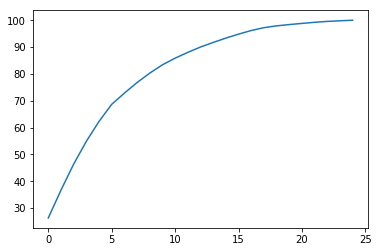

In [38]:
pca = PCA(n_components=25)
pca.fit(X_train_reduced)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print (var1)
plt.plot(var1)
plt.show()

In [39]:
#Tried Solving the problem  of class imbalance by creating new datapoints using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res_1, y_train_res_1 = sm.fit_sample(X_train,y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
x_train_res_1.shape

(169790, 63)

In [41]:
unique_elements, counts_elements = np.unique(y_train_res_1, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1]
 [84895 84895]]


In [42]:
pca = PCA(n_components=50)
pca.fit(x_train_res_1)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[ 24.14  39.69  49.65  58.07  63.82  69.4   73.36  77.1   80.07  82.53
  84.81  86.91  88.94  90.89  92.24  93.52  94.58  95.51  96.07  96.57
  96.99  97.33  97.67  97.96  98.18  98.39  98.56  98.72  98.87  99.    99.12
  99.23  99.33  99.42  99.5   99.56  99.62  99.67  99.71  99.75  99.78
  99.81  99.84  99.87  99.9   99.92  99.94  99.95  99.96  99.97]


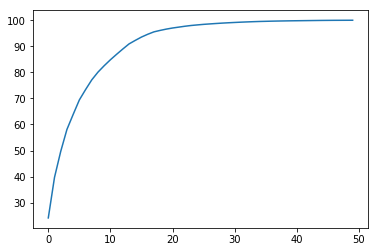

In [43]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print (var1)
plt.plot(var1)
plt.show()

In [44]:
pca = PCA(n_components=25)
pca.fit(processed.values)
X_train_reduced = pca.transform(x_train_res_1)

In [45]:
y_train_res_1 = y_train_res_1.reshape((y_train_res_1.shape[0], 1))
y_train_res_1.shape

(169790, 1)

In [46]:
epochs = 3
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=512

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

train_x, valid_x, train_y, valid_y = X_train_reduced,X_val_reduced,y_train_res_1,y_val

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
    saver.save(sess, "section2.ckpt")


('Epoch: 1/3', 'Train Loss: 0.1841', 'Train Acc: 0.9432')
('Epoch: 1/3', 'Validation Loss: 0.4600', 'Validation Acc: 0.8624')
('Epoch: 1/3', 'Train Loss: 0.1311', 'Train Acc: 0.9528')
('Epoch: 1/3', 'Validation Loss: 0.2345', 'Validation Acc: 0.9116')
('Epoch: 1/3', 'Train Loss: 0.1116', 'Train Acc: 0.9615')
('Epoch: 1/3', 'Validation Loss: 0.1592', 'Validation Acc: 0.9357')
('Epoch: 2/3', 'Train Loss: 0.1002', 'Train Acc: 0.9658')
('Epoch: 2/3', 'Validation Loss: 0.1259', 'Validation Acc: 0.9488')
('Epoch: 2/3', 'Train Loss: 0.0925', 'Train Acc: 0.9689')
('Epoch: 2/3', 'Validation Loss: 0.1038', 'Validation Acc: 0.9581')
('Epoch: 2/3', 'Train Loss: 0.0862', 'Train Acc: 0.9717')
('Epoch: 2/3', 'Validation Loss: 0.0817', 'Validation Acc: 0.9665')
('Epoch: 3/3', 'Train Loss: 0.0813', 'Train Acc: 0.9739')
('Epoch: 3/3', 'Validation Loss: 0.0586', 'Validation Acc: 0.9770')
('Epoch: 3/3', 'Train Loss: 0.0770', 'Train Acc: 0.9754')
('Epoch: 3/3', 'Validation Loss: 0.0558', 'Validation Acc: 0

In [47]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"section2.ckpt")
    feed={
        model.inputs:X_test_reduced,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict[10]

INFO:tensorflow:Restoring parameters from section2.ckpt


array([ 0.02451068], dtype=float32)

In [48]:
print (f1_score(test_predict.round(),y_test , average=None))

[ 0.97519865  0.29931973]


In [49]:
#SVM

clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)
clf.fit(X_train_reduced, y_train_res_1)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [50]:
pred = clf.predict(X_test_reduced)
print (accuracy_score(y_test, pred))
print (f1_score(y_test, pred, average=None))

0.95088372093
[ 0.9745444   0.30343008]


In [51]:
processed.head()

,X,Y,size,bold,an uppercse,all uppercase,single digit,multiple digit,special character,email,...,Color_#363d4c,Color_#434343,Color_#656565,Color_#7f7f7f,Color_#878787,Color_#bfbfbf,Color_#d4a5bc,Color_#ff0000,Color_#ffff98,Color_#ffffff
0,0.423140,0.011455,0.476440,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.502086,0.011455,0.476440,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.644378,0.046306,0.267016,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.677356,0.046306,0.267016,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.694701,0.046306,0.267016,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X = processed.values
print (X.shape)

(107494, 63)


In [53]:
X = pca.transform(X)

In [54]:
X.shape

(107494, 25)

In [55]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"final.ckpt")
    feed={
        model.inputs:X,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict[10]

INFO:tensorflow:Restoring parameters from final.ckpt


array([ 0.00959001], dtype=float32)

In [56]:
word_id = data.as_matrix(columns=data.columns[0:1])
word_id[0]

array([234378])

In [65]:
output_values = output.as_matrix(columns=output.columns[0:1])
output_values = output_values.ravel()

In [66]:
word_id = word_id.ravel()
test_predict = test_predict.ravel()
print (word_id.shape)
print (test_predict.shape)
d = {'word ID': word_id, 'predicted_output': test_predict,'actual_values':output_values}
df = pd.DataFrame(data=d)

(107494,)
(107494,)


In [70]:
df.head(10)

,actual_values,predicted_output,word ID
0,1,0.053826,234378
1,0,0.037022,234378
2,0,0.008709,71195
3,0,0.006030,201816
4,0,0.012830,166593
5,0,0.003603,234378
6,0,0.008617,234378
7,0,0.008139,234378
8,0,0.009990,27780
9,0,0.004396,234378


In [71]:
df.predicted_output = df.predicted_output.round()

In [79]:
df.ix[25:40]

,actual_values,predicted_output,word ID
25,0,0.0,234378
26,0,0.0,234378
27,1,1.0,167874
28,1,1.0,127485
29,0,0.0,77936
30,0,0.0,87610
31,0,0.0,190806
32,0,0.0,166593
33,0,0.0,234378
34,0,0.0,167874


In [80]:
print word_id.shape
print test_predict.shape

(107494,)
(107494,)


In [90]:
test_predict = np.array(test_predict)
test_predict = np.around(test_predict)

In [105]:
section_maker = []
for i in range (test_predict.shape[0]):
    if test_predict[i]==1:
        section_maker.append(word_id[i])

In [93]:
section_maker

[167874,
 127485,
 165938,
 23021,
 21716,
 17350,
 100815,
 45445,
 121293,
 21716,
 234378,
 234378,
 234378,
 234378,
 234378,
 51933,
 60220,
 124531,
 22476,
 234378,
 195166,
 136346,
 234378,
 177271,
 234378,
 234378,
 234378,
 51933,
 60220,
 124531,
 234378,
 22476,
 234378,
 195166,
 136346,
 234378,
 177271,
 234378,
 234378,
 51933,
 60220,
 124531,
 234378,
 22476,
 234378,
 195166,
 136346,
 234378,
 177271,
 234378,
 234378,
 164220,
 51933,
 60220,
 124531,
 22476,
 234378,
 195166,
 136346,
 234378,
 177271,
 234378,
 23021,
 234378,
 234378,
 51933,
 60220,
 124531,
 22476,
 234378,
 195166,
 136346,
 234378,
 177271,
 234378,
 234378,
 234378,
 51933,
 234378,
 234378,
 234378,
 51933,
 60220,
 124531,
 22476,
 234378,
 195166,
 136346,
 234378,
 177271,
 234378,
 234378,
 82380,
 234378,
 22476,
 175409,
 67515,
 132957,
 149270,
 131239,
 234378,
 234378,
 234378,
 234378,
 234378,
 51933,
 60220,
 124531,
 234378,
 22476,
 234378,
 195166,
 136346,
 234378,
 1772

In [106]:
section_maker = list(set(section_maker))

In [114]:
#this id was not found in nltk
section_maker.remove(234378)


In [97]:
import codecs 
import json 
os.chdir("/home/chinesh/Desktop/Internship")

with codecs.open('nltk_words.vocab', 'r', encoding="UTF‐8") as f: 
    word2id = json.load(f) 

In [116]:
#finally getting the section maker words using nltk
inv_map = {v: k for k, v in word2id.iteritems()}
for i in range(len(section_maker)):
    print (inv_map[section_maker[i]])


b
oracle
permanent
penta
soap
employment
contact
technical
matrix
resume
known
educational
customer
m
project
g
skill
work
j
lead
professional
address
core
t
looking
big
experience
nit
main
working
a
career
description
web
synopsis
it
organizational
seeking
certified
developer
p
course
java
s
d
no
management
care
data
language
certification
personal
o
i
c
current
e
summary
ust
objective
education
reface
competency
other
id
h
profile
